In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(19)

### **Завантаження даних**

Тут ми підключаємо датасет та дивимось на деякі спостереження, що містяться в ньому. Також ми використали метод describe() в бібліотеці Pandas, щоб отримати основні статистичні характеристики для даних - це нам знадобиться для уявлення про діапазони значень, а також дозволить визначити потенційні викиди (outliers).

In [29]:
data = pd.read_csv('TEST TASK (dataset).csv')
print(f'Всього спостережень в датасеті: {data.shape[0]}')

Всього спостережень в датасеті: 1467832


In [30]:
data.sample(5, random_state=19)

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
518366,1.0,1.0,1.0,1.0,0,0,0,0,1,1,...,2022-01-08,COUNTRY_141,0.000000,0.00000,0.000000,ios,0.0,0.0,0.000000,0.000000
278358,7.0,8.0,13.0,13.0,14,19,31,31,15,20,...,2022-01-10,COUNTRY_38,0.082983,0.09646,0.109278,ios,0.0,0.0,0.109278,0.109278
1436916,1.0,1.0,1.0,1.0,0,0,0,0,1,1,...,2021-12-30,COUNTRY_13,0.000000,0.00000,0.000000,android,0.0,0.0,0.000000,0.000000
1201813,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-30,COUNTRY_13,0.000000,0.00000,0.000000,android,0.0,0.0,0.000000,0.000000
997626,1.0,1.0,1.0,1.0,0,0,0,0,1,1,...,2022-01-03,COUNTRY_108,0.000000,0.00000,0.000000,android,0.0,0.0,0.000000,0.000000


In [31]:
with pd.option_context('display.max_columns', None):
    display(data.describe().round(3))

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
count,1466467.000,1466465.000,1466464.000,1466458.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000,1467832.000
mean,1.847,2.194,2.609,3.113,1.235,1.498,1.772,2.055,2.100,2.382,2.676,2.980,0.316,0.402,0.508,0.636,30.694,34.741,39.919,46.775,16.551,20.308,25.037,31.121,0.963,1.136,1.308,1.488,0.125,0.063,0.036,0.593,1.097,1.664,1.396,1.986,2.585,0.170,0.294,0.454,8.686,14.911,23.047,0.479,0.871,1.266,0.001,0.001,0.007,0.102,0.126,0.150,0.009,0.011,0.013,0.022,0.214,0.021,0.257
std,2.531,3.622,5.347,7.888,3.048,3.975,5.034,6.326,3.117,4.077,5.180,6.534,1.012,1.442,1.978,2.722,137.866,149.873,174.867,202.007,57.020,78.223,102.202,136.833,2.303,2.878,3.462,4.211,0.330,0.243,0.186,1.556,2.577,4.136,1.708,2.694,4.285,0.662,0.977,1.523,26.628,46.473,79.521,1.214,1.970,2.995,0.018,0.061,0.129,0.767,0.968,1.176,0.045,0.060,0.075,0.309,2.098,0.160,2.274
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-955.000,-955.000,-955.000,0.000,-7.000,-7.000,-7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-29.000,0.000,0.000,0.000,0.000,-2.830,-2.830,0.000,0.000,0.000,0.000,0.000,0.000,-2.830,0.000,0.000,-2.777
25%,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,20.000,20.000,20.000,20.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,20.000,20.000,20.000,20.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2.000,2.000,2.000,2.000,1.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,0.000,0.000,0.000,0.000,25.000,25.000,25.000,26.000,17.000,17.000,17.000,17.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,2

З отриманих описових характеристик бачимо, що для колонок, що містять інформацію про кількість витрачених diamonds та tickets, а також про ltv за підписками маємо мінімальні значення від'ємні. Але зрозуміло, що від'ємна кількість витрачених коштів чи одниць валюти всередині гри це некоректно.

Для вирішення даної проблеми спочатку поглянемо скільки таких некоректних записів ми взагалі маємо в наборі даних.

In [32]:
suspicious_columns = [
    'diamonds_spent_day1', 'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
    'diamonds_spent_session9', 'app_sub_ltv_day1', 'app_sub_ltv_day3', 'target_sub_ltv_day30', 'target_full_ltv_day30'
]
suspicious_columns_df = pd.DataFrame(index=suspicious_columns, columns=['Qty', '% of total target full ltv'])
for column in suspicious_columns:
    suspicious_columns_df.loc[column, 'Qty'] = data[data[column] < 0].shape[0]
    suspicious_columns_df.loc[column, '% of total target full ltv'] = (
        data[data[column] < 0]['target_full_ltv_day30'].sum() / data['target_full_ltv_day30'].sum() * 100
    )
suspicious_columns_df

,Qty,% of total target full ltv
diamonds_spent_day1,2,0.000081
diamonds_spent_day3,2,0.000081
diamonds_spent_day7,2,0.000081
tickets_spent_day1,2,0.000081
tickets_spent_day3,2,0.000081
tickets_spent_day7,2,0.000081
diamonds_spent_session9,1,0.000081
app_sub_ltv_day1,1,-0.000737
app_sub_ltv_day3,2,0.001522
target_sub_ltv_day30,2,0.001522


Оскільки таких спостережень занадто мало, то це точно викиди, тому видаляємо дані рядки.

In [33]:
for column in suspicious_columns:
    data.drop(index=data[data[column] < 0].index, inplace=True)

### **Заповнення відсутніх даних**

Після видалення зайвих спостережнь, що спотворюють дані, ми маємо також деякі рядки спостережнь із відсутніми значеннями в деяких колонках

In [34]:
missing = data.isna().sum()
missing.loc[missing > 0]

total_sessions_day0    1365
total_sessions_day1    1367
total_sessions_day3    1368
total_sessions_day7    1374
dtype: int64

In [35]:
data[np.any(data.isna(), axis=1)].sample(5, random_state=19)

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
294972,NaN,NaN,NaN,NaN,0,0,0,0,1,1,...,2022-01-11,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.0,0.000000,0.000000,0.000000
1269265,NaN,NaN,NaN,NaN,0,0,0,0,1,1,...,2022-01-02,COUNTRY_13,0.000000,0.000000,0.000000,android,0.0,0.000000,0.000000,0.000000
545355,NaN,NaN,NaN,NaN,1,1,1,1,1,1,...,2021-12-20,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.0,1.475027,0.000000,1.475027
1340821,NaN,NaN,NaN,NaN,2,2,2,2,3,3,...,2021-12-26,COUNTRY_155,0.021313,0.021313,0.021313,ios,0.0,0.000000,0.021313,0.021313
13345,NaN,NaN,NaN,NaN,3,3,3,3,4,4,...,2021-12-02,COUNTRY_141,0.046889,0.046889,0.046889,ios,0.0,0.990924,0.046889,1.037813


Для заповнення відсутніх значень скористаємось класичним прийомом та заповнимо їх медіаними значеннями.

In [36]:
missing_values_median = pd.Series(
    index=[f'total_sessions_day{idx}' for idx in [0, 1, 3, 7]], data=[data[f'total_sessions_day{idx}'].median() for idx in [0, 1, 3, 7]]
)
print(f'''\
Median for zeroth day: {missing_values_median[0]}, for first day: {missing_values_median[1]}, \
for third day: {missing_values_median[2]}, for seventh day: {missing_values_median[3]}
''')

Median for zeroth day: 1.0, for first day: 1.0, for third day: 1.0, for seventh day: 1.0



Отримали медіані значення рівні одиниці, що загалом нас влаштовує, адже такі значення не виходять за межі допустимих.

In [37]:
for column, value in missing_values_median.iteritems():
    data[column].fillna(value=value, inplace=True)

### **Аналіз деяких дивних значень в спостереженнях**

Також звернемо увагу на ще деякі випадки некоректних даних:
    - кумулятивна кількість сесій в певний день рівна нулю, але при цьому кумулятивна кількість відкритих глав для того ж дня більше, ніж нуль
    - кількість закінчених або завершених глав більше, ніж кількість відкритих
    
Для даних випадків також поглянемо на кількість таких спостережень та їхній вклад в сумарне значення target_full_ltv_day30

In [38]:
columns_for_chapters = [f'{column}{idx}' for column, idx in list(zip(['day'] * 4, [0, 1, 3, 7])) + list(zip(['session'] * 3, [1, 3, 9]))]
suspicious_columns = [
    [f'total_sessions_day{idx} = 0' + ' & ' + f'chapters_opened_day{idx} > 0' for idx in [0, 1, 3, 7]] + 
    [f'chapters_finished_{idx} > chapters_opened_{idx}' for idx in columns_for_chapters] +
    [f'chapters_closed_{idx} > chapters_opened_{idx}' for idx in columns_for_chapters]
][0]
suspicious_columns_df = pd.DataFrame(index=suspicious_columns, columns=['Qty', '% of total rows count', '% of total target full ltv'])
suspicious_columns_df['Qty'] = [
    [data.loc[(data[f'total_sessions_day{idx}'] == 0)&(data[f'chapters_opened_day{idx}'] > 0)].shape[0] for idx in [0, 1, 3, 7]] + 
    [data.loc[data[f'chapters_closed_{idx}'] > data[f'chapters_opened_{idx}']].shape[0] for idx in columns_for_chapters] +
    [data.loc[data[f'chapters_finished_{idx}'] > data[f'chapters_opened_{idx}']].shape[0] for idx in columns_for_chapters]
][0]
suspicious_columns_df['% of total rows count'] = (suspicious_columns_df['Qty'] / data.shape[0])
suspicious_columns_df['% of total target full ltv'] = (np.array([
    [data.loc[(data[f'total_sessions_day{idx}'] == 0)&(data[f'chapters_opened_day{idx}'] > 0)]['target_full_ltv_day30'].sum() for idx in [0, 1, 3, 7]] + 
    [data.loc[data[f'chapters_finished_{idx}'] > data[f'chapters_opened_{idx}']]['target_full_ltv_day30'].sum() for idx in columns_for_chapters] +
    [data.loc[data[f'chapters_closed_{idx}'] > data[f'chapters_opened_{idx}']]['target_full_ltv_day30'].sum() for idx in columns_for_chapters]
][0]) / data['target_full_ltv_day30'].sum() * 100).round(3)
suspicious_columns_df

,Qty,% of total rows count,% of total target full ltv
total_sessions_day0 = 0 & chapters_opened_day0 > 0,312,0.000213,0.071
total_sessions_day1 = 0 & chapters_opened_day1 > 0,209,0.000142,0.044
total_sessions_day3 = 0 & chapters_opened_day3 > 0,156,0.000106,0.032
total_sessions_day7 = 0 & chapters_opened_day7 > 0,101,0.000069,0.018
chapters_finished_day0 > chapters_opened_day0,21,0.000014,0.028
chapters_finished_day1 > chapters_opened_day1,20,0.000014,0.020
chapters_finished_day3 > chapters_opened_day3,22,0.000015,0.036
chapters_finished_day7 > chapters_opened_day7,22,0.000015,0.047
chapters_finished_session1 > chapters_opened_session1,23,0.000016,0.025
chapters_finished_session3 > chapters_opened_session3,25,0.000017,0.031


In [39]:
print(f'Total percent of total target full ltv for suspiciouts columns:  {suspicious_columns_df["% of total target full ltv"].sum()}%')

Total percent of total target full ltv for suspiciouts columns:  0.417%


Оскільки дані рядки також не вносять суттєвих вкладів в цільову змінну, то також видаляємо дані рядки.

In [40]:
for idx in [0, 1, 3, 7]:
    data.drop(index=data.loc[(data[f'total_sessions_day{idx}'] == 0)&(data[f'chapters_opened_day{idx}'] > 0)].index, inplace=True)
for idx in columns_for_chapters:
    data.drop(index=data.loc[data[f'chapters_finished_{idx}'] > data[f'chapters_opened_{idx}']].index, inplace=True)
    data.drop(index=data.loc[data[f'chapters_closed_{idx}'] > data[f'chapters_opened_{idx}']].index, inplace=True)

### **Feature engineering**

Набір даних містить дуже багато кумулятивних ознак. Очевидно, що вони залежні одна від одної і будуть корелювати. Для прикладу розглянемо кореляційну матрицю для total_sessions_day{N}:

Text(0.5, 1.0, 'Correlation matrix for total_sessions_day')

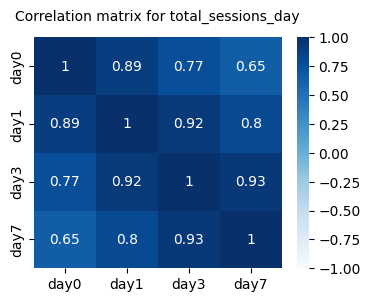

In [62]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

heatmap = sns.heatmap(data[['total_sessions_day' + day for day in ['0', '1', '3', '7']]].corr(), vmin=-1, vmax=1, annot=True, cmap='Blues', ax=ax, xticklabels=['day0', 'day1', 'day3', 'day7'], yticklabels=['day0', 'day1', 'day3', 'day7'])
heatmap.set_title('Correlation matrix for total_sessions_day', fontdict={'fontsize':10}, pad=12)

Дійсно, отримані значення досить великі і ми спостерігаємо мультиколінеарність - кореляція між незалежними змінними. Це може стати причиною перенавчання моделі, а, також, надлишкова кількість змінних ускладнює модель, що в свою чергу потребує більших обчислювальних ресурсів та довшого часу навчання.             
Отже, ми не можемо навчати модель на усіх фічах початкового набору даних. Тому ми почали виділяти деякі ключові ознаки, а також агрегувати окремі колонки.    

Перше, що ми віришили зробити - це зрозуміти яку тенденцію використання гри має користувач на основі ознаки total_sessions_day{N}. Активність користувача має вплив на цільову змінну, адже, щонайменш, чим більше користувач проводить часу у грі, тим більше він дивиться реклами.                
Отже, нам необхідно з 4 значень для окремих днів отримати одне число, яке буде відображати тенденцію використання гри користувача. Що можна зробити?            
Оскільки, ця ознака - кумулятивна, то якщо розмістити це спостереження на координатній площині, де по осі Ох відкладати дні, а по Оу - кумулятивну кількість сесій в цей день, то отримаємо неспадний графік. Тут ми згадуємо рівняння прямої $y=kx+b$  і намагаємося провести через ці точки таку пряму, для якої залишкова сума квадратів буде найменшою.Тоді коефіцієнт $k$ буде більшим для тих користувачів, які активно користуються грою усі дні спострежень, та прямувати до нуля у протилежному випадку. Знаходити оптимальне k можна за допомогою лінійної регресії. Але тоді втрачається важливість користувачів, які дуже активно користувались додатком у перші дні, це можна компенсувати враховуючи і зміщення $b$.       
Ця ідея реалізована у функції trend_coeff(observations),

In [63]:
def trend_coeff(observations):
    '''
        Допоміжна функція, що потрібна для знаходження коефіцієнту лінійної залежності.
    '''
    X = np.array([0, 1, 3, 7])[:len(observations), np.newaxis]
    model = LinearRegression(n_jobs=-1).fit(X, np.array(observations)[:, np.newaxis])
    return [model.coef_[0][0], model.intercept_[0]]

In [64]:
data[['total_sessions_trend', 'total_sessions_bias']] = data[[f'total_sessions_day{day}' for day in [0, 1, 3, 7]]].\
    apply(trend_coeff, axis=1).apply(pd.Series).rename(columns={0: 'total_sessions_trend', 1: 'total_sessions_bias'})

Тепер поглянемо, як корелюють між собою та таргетною змінною наступні фічі (враховувати будемо лише останній день):

In [66]:
resources_per_day = ['diamonds_received_day', 'diamonds_spent_day', 'tickets_spent_day']
resources_per_session = ['diamonds_spent_session', 'tickets_spent_session']

Спостерігаємо, що:
* По-перше, витрати за дні дуже корелюють з витратами за сессії, одну з них необхідно виключити, нехай це будуть значення за сесії, адже вони менше корелюють з таргетною змінною
* По-друге, кількість отриманих кристалів значно корелює з кількістю витрачених кристалів, очевидно, що більше на таргетну змінну будуть впливати витрати, тому залишимо їх, а виключимо diamonds_received_day{N}

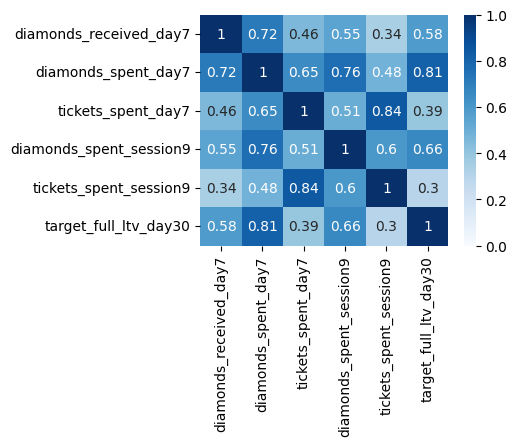

In [69]:
features = [feature + '7' for feature in resources_per_day] + [feature + '9' for feature in resources_per_session]

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

heatmap = sns.heatmap(data[features + ['target_full_ltv_day30']].corr(), vmin=0, vmax=1, annot=True, cmap='Blues', ax=ax)

Застосуємо до diamonds_spent_day{N}, tickets_spent_day{N} ту ж логіку, що й до total_sessions_day{N}:

In [70]:
data[['diamonds_spent_trend', 'diamonds_spent_bias']] = data[[f'diamonds_spent_day{day}' for day in [0, 1, 3, 7]]].\
    apply(trend_coeff, axis=1).apply(pd.Series).rename(columns={0: 'diamonds_spent_trend', 1: 'diamonds_spent_bias'})

In [71]:
data[['tickets_spent_trend', 'tickets_spent_bias']] = data[[f'tickets_spent_day{day}' for day in [0, 1, 3, 7]]].\
    apply(trend_coeff, axis=1).apply(pd.Series).rename(columns={0: 'tickets_spent_trend', 1: 'tickets_spent_bias'})

#### **Перевірка залежності LTV від того, яким чином користувач використовує нашу гру**

Тут ми хочемо зрозуміти чи важливо для нас, що користувач просто закриває глави чи все-таки він їх завершує. Подивимось, який відсоток від загального значення LTV приносять користувачі, що частіше завершують глави, ніж просто закривають їх. 

Розглянемо, наприклад, користувачів, що завершують глави мінімум в 1.5 рази більше, ніж просто їх закривають.

In [80]:
LTV_from_special_users = data.loc[data['chapters_finished_session9'] > data['chapters_closed_session9'] * 1.5, 'target_full_ltv_day30'].sum()
Total_LTV = data['target_full_ltv_day30'].sum()
print(f'{LTV_from_special_users / Total_LTV * 100 : .2f}%')

 91.78%


Тобто 91.78% від виручки приносять користувачі, що в 1.5 рази частіше завершують глави, ніж просто закривають. Таким чином ми вирішили зробити наступну агреговану метрику, що враховуватиме даний фаткор.

$Chapters\,finished\,ratio\,=\frac{Cumulative\,chapters\,finished\,qty\,-\,Cumulative\,chapters\,closed\,qty}{Cumulative\,chapters\,opened\,qty}$

Чисельник в даному випадку буде від'ємним, якщо користувач часто закриває глави, а не завершує їх, а додатнім в противному випадку. Знаменик мість кількість відкритих глав та потрібен для нормування отриманої метрики.

In [81]:
for idx in [1, 3, 9]:
    data[f'chapters_finished_ratio{idx}'] = (
        (data[f'chapters_finished_session{idx}'] - data[f'chapters_closed_session{idx}']) / data[f'chapters_opened_session{idx}']
    ).fillna(0)

Тут у нас виникає іноді ділення на нуль, якщо глави взагалі ніколи не відкривались користувачем, тоді логічно, що значення нашої метрики буде рівне нулю.
Якщо користувач часто завершує глави, то значення прямуватиме до одиниці, в противному випадку до -1.

In [82]:
data[[f'chapters_finished_ratio{idx}' for idx in [1, 3, 9]]].describe().round(3)

,chapters_finished_ratio1,chapters_finished_ratio3,chapters_finished_ratio9
count,1467277.000,1467277.000,1467277.000
mean,0.104,0.147,0.159
std,0.368,0.415,0.422
min,-1.000,-1.000,-1.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,0.500,0.500
max,1.000,1.000,1.000


Також ми помітили, що MSE для отриманої метрики станом на першу сесію користувача, третю та дев'яту не дуже велике, тому ми вважаємо дане відношення за константу. Тобто якщо користувач від самого початку частіше завершує глави, ніж просто закриває їх, то він так робитиме і надалі.

In [83]:
custom_metric_mse = pd.DataFrame(columns=[f'chapters_finished_ratio{idx}' for idx in [1, 3, 9]], index=[f'chapters_finished_ratio{idx}' for idx in [1, 3, 9]])
for i in [1, 3, 9]:
    for j in [1, 3, 9]:
        custom_metric_mse.loc[f'chapters_finished_ratio{i}', f'chapters_finished_ratio{j}'] = (
            (data[f'chapters_finished_ratio{i}'] - data[f'chapters_finished_ratio{j}']) ** 2
        ).mean()
custom_metric_mse

,chapters_finished_ratio1,chapters_finished_ratio3,chapters_finished_ratio9
chapters_finished_ratio1,0.0,0.059155,0.072313
chapters_finished_ratio3,0.059155,0.0,0.016576
chapters_finished_ratio9,0.072313,0.016576,0.0


In [84]:
data['chapters_finished_ratio'] = (data['chapters_finished_ratio1'] + data['chapters_finished_ratio3'] + data['chapters_finished_ratio9']) / 3

Також варто зазначити, що ми використали саме фічі, що пов'язані з кількістю сесій, а не днем, коли це відбулось. Такий вибір був зроблений, оскільки ми вже перед цим порахували тренд кільікості сесій, що пов'язаний з днем, а отже дана фіча вже має враховувати дні.

#### **Агрегована фіча для LTV**

Оскільки нам відома формула для розрахунку full_ltv, то ми його розрахували для нульового, першого та третього дня, оскільки в наборі даних ми мали складові даної метрики для зазначених днів.

In [85]:
for idx in [0, 1, 3]:
    data[f'full_ltv_day{idx}'] = data[f'app_sub_ltv_day0'] + data[f'app_iap_ltv_day{idx}'] + data[f'ad_ltv_day{idx}']

In [86]:
data[[f'full_ltv_day{idx}' for idx in [0, 1, 3]]].describe().round(3)

,full_ltv_day0,full_ltv_day1,full_ltv_day3
count,1467277.000,1467277.000,1467277.000
mean,0.112,0.137,0.163
std,0.783,0.991,1.205
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,0.000,0.000
max,46.371,160.481,160.703


In [87]:
data['mean_full_ltv'] = (data['full_ltv_day0'] + data['full_ltv_day1'] / 2 + data['full_ltv_day3'] / 4) / 3

#### **Перевірка залежності LTV від media_source, country_code, platform**

Для цього було вирішено згрупувати дані по наведеним фічам та подивитись на середню прибутковість користувачів в даних категоріях.

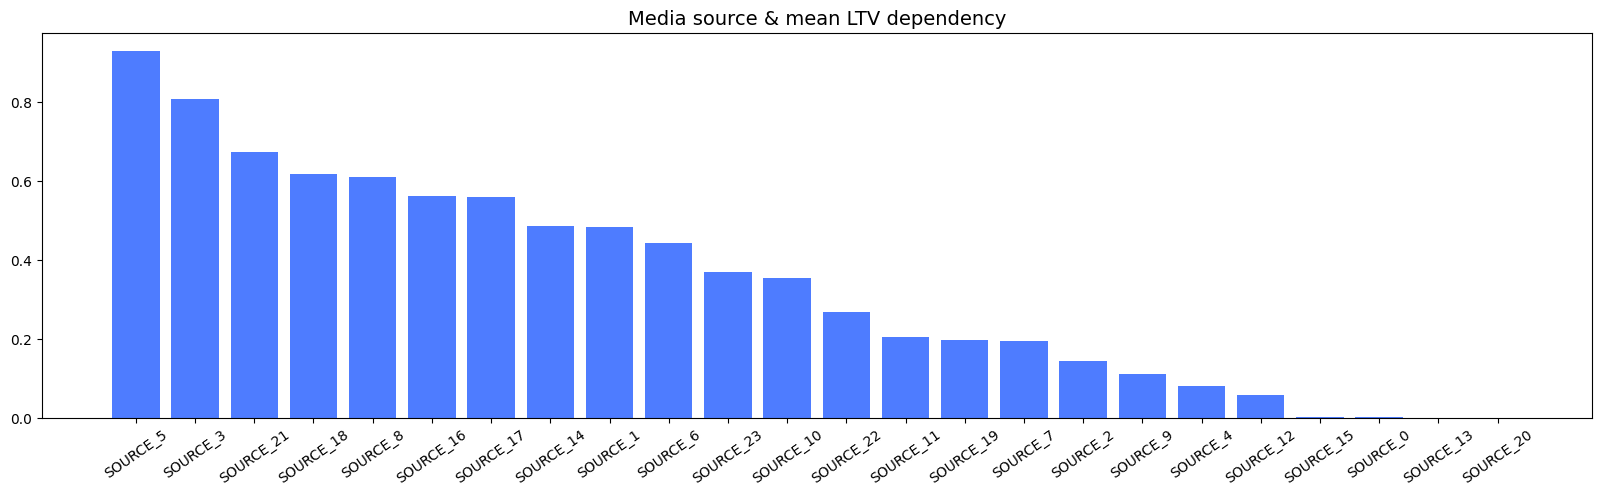

In [76]:
media_source = data.groupby(by='media_source')['target_full_ltv_day30'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 5))
plt.title('Media source & mean LTV dependency', fontsize=14)
plt.bar(media_source.index, media_source.values, color='#4E7CFF')
plt.xticks(rotation=35)
plt.show()

Бачимо, що media_source має суттєвий вплив на LTV, адже залежно від даної фічі ми маємо абсолютно різні середні значення LTV. Насправді, аналогічні висновки ми можемо зробити і для country_code та platform.

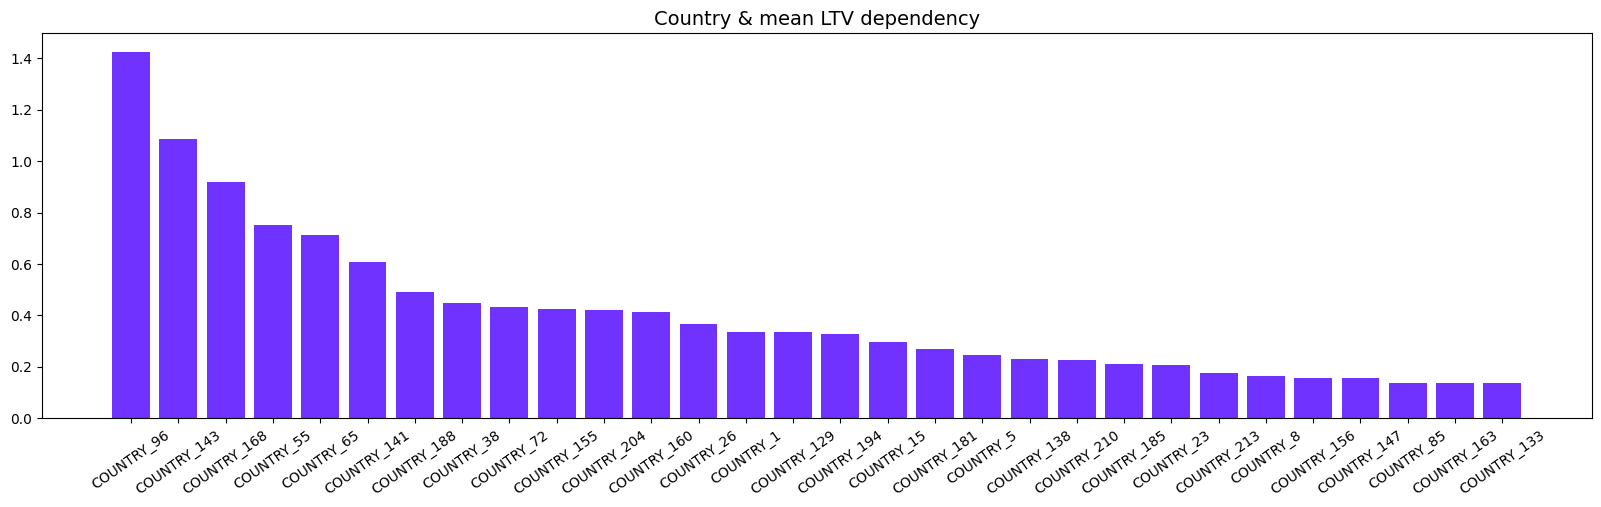

In [77]:
country_code = data.groupby(by='country_code')['target_full_ltv_day30'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(20, 5))
plt.title('Country & mean LTV dependency', fontsize=14)
plt.bar(country_code.index, country_code.values, color='#7033FF')
plt.xticks(rotation=35)
plt.show()

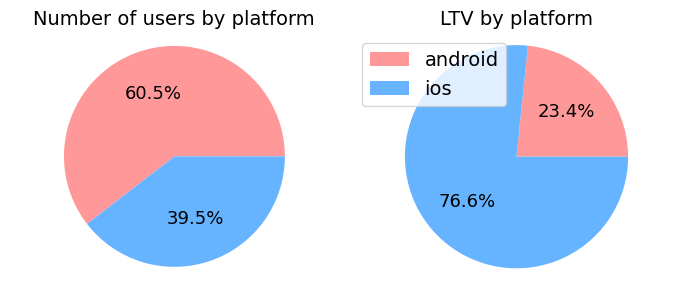

In [75]:
def plot_pie(ax, values, colors):
    patches, texts, autotexts = ax.pie(values, colors=colors, autopct='%1.1f%%')
    for text in texts:
        text.set_size(14)
        #text.set_color('grey')  
    for autotext in autotexts:
        autotext.set_size(13)
        #autotext.set_color('grey')
    ax.axis('equal')

fig, ax = plt.subplots(ncols=2, figsize=(7, 3))

colors = ['#ff9999','#66b3ff']

platform_info = data['platform'].value_counts()
ax[0].set_title('Number of users by platform', fontsize=14)
plot_pie(ax[0], platform_info.values, colors)

ltv_by_platform = [data.loc[data['platform'] == platform]['target_full_ltv_day30'].sum() for platform in list(platform_info.index)]
ax[1].set_title('LTV by platform', fontsize=14)
plot_pie(ax[1], ltv_by_platform, colors)
    
plt.legend(labels=list(platform_info.index), loc="best", prop={'size': 14})
plt.tight_layout()

### Проміжні висновки
- Ми прийшли до висновку, що media_source, country_code, platform краще не враховувати, адже це категоріальні змінні, і для них потрібно робити певні перетворення, які призведуть до значного збільшення розмірності вхідних даних, що не дало покращення результатів під час проведених експериментів.
- Також ми вважаємо, що немає сенсу в даній моделі враховувати дату встановлення гри, адже по суті нас лише цікавить скільки днів користувач проведе в самій грі і це не дуже залежить від того, коли він її встановив.

### **Формуємо остаточний датасет із сформованих нами нових агрегованих фіч**

In [88]:
data_new = data[
    ['total_sessions_trend', 'chapters_finished_ratio', 'mean_full_ltv','diamonds_spent_trend', 'diamonds_spent_bias', 'tickets_spent_trend',
       'tickets_spent_bias' , 'target_full_ltv_day30']
].copy()

Для початку ми обрали модель лінійної регресії. Для її використання нам потрібно замінити categorical дані в деяких колонках на числові. Для цього було вирішено перетворити ці колонки до вигляду one hot encoding. Але ми маємо 24 media_source та 224 country_code і вони при такому підході перетворяться в 248 колонок. Для вирішення даної проблеми ми вирішили подивитись на загальну кількість записів в групах media_source, а потім по country_code. На основі цього підібрали такі порогові значення цієї кількості, щоб усе інше помістити в групу Other.

#### **Побудова моделі**

За алгоритм для побудови моделі було обрано XGBoost, оскільки цю модель можна візуалізувати та інтерпретувати. В основі нього лежать дерева рішень, але використовується не один прогнозатор, а декілька. Градієнтний бустинг
послідовно додає прогнозатори до ансамблю, причому кожний прогнозатор коригує свого попередника. Це робиться шляхом налаштування нового прогнозатора таким чином, щоб мінімізувати залишкові помилки (residual errors), допущені попереднім прогнозатором.
Прогноз на новому прикладі знаходять як суму прогнозів за всіма моделями.

In [90]:
X = data_new.loc[:, data_new.columns != 'target_full_ltv_day30']
y = data_new['target_full_ltv_day30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [91]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [92]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [98]:
print('MAPE:', mean_absolute_percentage_error(model.predict(X_test), y_test))
print('RMSE:', mean_squared_error(model.predict(X_test), y_test) ** 0.5)
print('MAE:', mean_absolute_error(model.predict(X_test), y_test))

MAPE: 1.4564619059622008
RMSE: 1.1563457893655582
MAE: 0.10390039350662196


In [101]:
print('MAPE:', mean_absolute_percentage_error(model.predict(X_train), y_train))
print('RMSE:', mean_squared_error(model.predict(X_train), y_train) ** 0.5)
print('MAE:', mean_absolute_error(model.predict(X_train), y_train))

MAPE: 1.4103097511718725
RMSE: 0.7234418456606413
MAE: 0.09092156129094726


Отримане значення MAE вдвічі менше, ніж аналогічне для моделі, що містить в собі всі початкові фічі. Отже, весь наш процес агрегації фічей та аналізу призвів до покращення стандартної моделі. Також варто зазначити, що значення метрик для тестового набору даних та тренувального мають не досить значні розбіжності і тому можемо зробити висновок про те, що перенавчання як і недонавчання тут відсутні. Для подальшого покращення моделі варто спробувати нові комбінації фічей.